In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from matplotlib import font_manager
f_path = "C:\Windows\Fonts\malgun.ttf"
font_manager.FontProperties(fname=f_path).get_name()
from matplotlib import rc
rc('font', family='Malgun Gothic')

In [2]:
## 1. 전체 데이터, pickle 데이터 불러오기

In [3]:
jeju = pd.read_csv('./datas/jeju_full.csv')
jeju.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
with open('./datas/jeju_uniq_data5.pickle', 'rb') as f:
    may = pickle.load(f)

In [5]:
ewol_5 = may[may['dong'].isin(['애월읍'])]
ewol_5

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lon,lat,lon_lat,dong
7841,289,289,202005,제주특별자치도,제주시,일반,일반한식,00시,8000,0,1,0,888574.1192,1.495764e+06,126.30114679770172,33.447843033444606,126.30114679770172_33.447843033444606,애월읍
7842,56588,56588,202005,제주특별자치도,제주시,영세,서양음식,11시,36000,0,2,0,888574.1192,1.495764e+06,126.30114679770172,33.447843033444606,126.30114679770172_33.447843033444606,애월읍
7843,56589,56589,202005,제주특별자치도,제주시,영세,일반한식,11시,20000,0,2,0,888574.1192,1.495764e+06,126.30114679770172,33.447843033444606,126.30114679770172_33.447843033444606,애월읍
7844,56590,56590,202005,제주특별자치도,제주시,일반,일반한식,11시,21500,0,2,0,888574.1192,1.495764e+06,126.30114679770172,33.447843033444606,126.30114679770172_33.447843033444606,애월읍
7845,74367,74367,202005,제주특별자치도,제주시,영세,기타숙박업,12시,20000,0,1,0,888574.1192,1.495764e+06,126.30114679770172,33.447843033444606,126.30114679770172_33.447843033444606,애월읍
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273159,253956,253956,202005,제주특별자치도,제주시,일반,농축수산품,22시,340000,0,1,0,896175.8555,1.494701e+06,126.38304422970455,33.439020085185106,126.38304422970455_33.439020085185106,애월읍
273160,262486,262486,202005,제주특별자치도,제주시,일반,농축수산품,23시,300000,0,1,0,896175.8555,1.494701e+06,126.38304422970455,33.439020085185106,126.38304422970455_33.439020085185106,애월읍
273161,254349,254349,202005,제주특별자치도,제주시,영세,기타숙박업,22시,120000,0,2,0,900523.3820,1.494822e+06,126.42979493344613,33.44052190627038,126.42979493344613_33.44052190627038,애월읍
273169,262320,262320,202005,제주특별자치도,제주시,영세,일반한식,23시,72000,0,1,0,889273.0716,1.495918e+06,126.30864664368536,33.44929779988638,126.30864664368536_33.44929779988638,애월읍


In [6]:
with open('./datas/jeju_uniq_data6.pickle', 'rb') as f:
    june = pickle.load(f)

In [7]:
ewol_6 = june[june['dong'].isin(['애월읍'])]

In [8]:
with open('./datas/jeju_uniq_data7.pickle', 'rb') as f:
    july = pickle.load(f)

In [9]:
ewol_7 = july[july['dong'].isin(['애월읍'])]

In [10]:
with open('./datas/jeju_uniq_data8.pickle', 'rb') as f:
    august = pickle.load(f)

In [11]:
ewol_8 = august[august['dong'].isin(['애월읍'])]

In [ ]:
## 5, 6, 7, 8월 pickle 데이터 'ewol'에 합치고 'X', 'Y' 컬럼 드랍

In [12]:
frames = [ewol_5, ewol_6, ewol_7, ewol_8]
ewol = pd.concat(frames, axis=0)
ewol.drop(columns=['X', 'Y'], inplace=True)

In [ ]:
##'jeju' Type replace 해서 'ewol' 데이터에 넣기

In [13]:
ewol.replace(dict.fromkeys(['택시', '기타교통수단', '통신기기'], '교통/통신'), inplace=True)
ewol.replace(dict.fromkeys(['대형할인점', '농축협직영매장', '농협하나로클럽', '편의점', '슈퍼마켓', '정육점', '기타유통업', '연쇄점', '상품권', '인삼제품', '홍삼제품', '농축수산품', '주류판매점', '기타건강식', '건강식품(회원제형태)'], '마트/편의점(유통)'), inplace=True)
ewol.replace(dict.fromkeys(['악기점', 'DVD음반테이프판매', '문화취미기타', '영화관', '티켓', '수족관', '화랑'], '영화/문화'), inplace=True)
ewol.replace(dict.fromkeys(['내의판매점', '양품점', '옷감직물', '귀금속', '기타직물', '스포츠의류', '가방', '정장', '악세사리', '기타잡화', '신발', '기타의류', '단체복', '아동의류', '캐쥬얼의류', '맞춤복점', '제화점', '인터넷Mall', '인터넷종합Mall'], '쇼핑/패션'), inplace=True)
ewol.replace(dict.fromkeys(['제과점', '스넥', '기타음료식품'], '카페/베이커리'), inplace=True)
ewol.replace(dict.fromkeys(['미용재료', '화장품', '피부미용실', '미용원', '이용원'], '뷰티'), inplace=True)
ewol.replace(dict.fromkeys(['구내매점', '단란주점', '주점', '서양음식', '일반한식', '일식회집', '중국음식',  '유흥주점', '칵테일바'], '외식/주점'), inplace=True)
ewol.replace(dict.fromkeys(['세탁소', '애완동물', '화원', '침구수예점', '성인용품점', '가전제품', '기타가구', '조명기구', '민예공예품', '주방용식기', '기타전기제품', '소프트웨어', '주방용구', '카페트커텐천막', '컴퓨터', '카메라', '일반가구', '정수기', '철제가구', '시계', '안경', '사우나', '안마스포츠마사지', '사진관', '인테리어', 'CATV'], '생활/기타'), inplace=True)
ewol.replace(dict.fromkeys(['완구점', '화방표구점', '문구용품', '일반서적', '출판인쇄물', '기타사무용', '사무기기', '전문서적', '정기간행물', '기타서적문구', '서적출판(회원제형태)'], '서점/문구'), inplace=True)
ewol.replace(dict.fromkeys(['기타보험', '손해보험'], '금융'), inplace=True)
ewol.replace(dict.fromkeys(['기념품점', '기타숙박업', '특급호텔', '2급호텔', '1급호텔', '콘도', '렌트카', '관광여행', '항공사', '여객선', '면세점'], '여행/숙박'), inplace=True)
ewol.replace(dict.fromkeys(['레져용품수리', '스포츠레져용품', '골프용품', '노래방', '당구장', '골프경기장', '볼링장', '골프연습장', '헬스크럽', '레져업소(회원제형태)', '기타레져업', '종합레져타운', '수영장', '테니스장', '기타회원제형태업소', ], '레저/스포츠'), inplace=True)
ewol.replace(dict.fromkeys(['유아원', '독서실', '보습학원', '기능학원', '기타교육', '외국어학원', '학원(회원제형태)', '예체능학원', '컴퓨터학원', '대학등록금', '학습지교육', '초중고교육기관'], '교육/육아'), inplace=True)
ewol.replace(dict.fromkeys(['주유소', '자동차정비', 'LPG', '세차장', '유류판매', '이륜차판매', '윤활유전문판매', '자동차시트타이어', '중고자동차', '수입자동차', '자동차부품', '주차장', '기타자동차서비스', '카인테리어', ], '주유/자동차'), inplace=True)
ewol.replace(dict.fromkeys(['약국', '종합병원', '기타의료기관및기기', '한약방', '제약회사', '의료용품', '건강진단', '한의원', '동물병원', '의원', '치과의원', '병원', '산후조리원', '치과병원'], '의료'), inplace=True)
ewol.replace(dict.fromkeys(['목재석재철물', '건축요업품', '골동품점', '기계공구', '기타건축자재', '보일러펌프', '페인트', '냉열기기', '유리', '과학기자재', '기타광학품', '기타연료', '중장비수리', ], '건설/제조'), inplace=True)
ewol.replace(dict.fromkeys(['기타농업관련', '비료농약사료종자', '농기계', '미곡상'], '농업'), inplace=True)
ewol.replace(dict.fromkeys(['사무서비스', '기타대인서비스', '화물운송', '보관창고업', '종합용역', '조세서비스', '가례서비스', '공공요금', '위탁급식업', '기타용역서비스', '기타수리서비스', '기타운송', '가정용품수리', '견인서비스', '부동산중개임대', '부동산분양', '신변잡화수리', '사무통신기기수리', '법률회계서비스', '사무서비스(회원제형태)', '정보서비스', '기타업종', '기타비영리유통'], '서비스/기타'), inplace=True)

In [15]:
tot_ewol = ewol.groupby(['YM', 'Type'], as_index=False).sum()
tot_ewol

,YM,Type,OBJECTID,Field1,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y
0,202005,건설/제조,16364123,16364123,93641557,13370002,2005,390,1.615613e+08,2.695652e+08
1,202005,교육/육아,26488318,26488318,225923330,7421260,624,28,1.812844e+08,3.025983e+08
2,202005,교통/통신,1029099,1029099,219000,79000,28,4,9.860293e+06,1.647091e+07
3,202005,농업,13288832,13288832,124950807,29826234,1414,413,1.314874e+08,2.200301e+08
4,202005,레저/스포츠,48950394,48950394,577730710,10110040,6723,337,3.362909e+08,5.611336e+08
...,...,...,...,...,...,...,...,...,...,...
63,202008,영화/문화,10993387,10993387,42587900,88770,1898,4,7.889456e+07,1.316388e+08
64,202008,외식/주점,771689964,771689964,2782461539,6287372,85698,200,4.853762e+09,8.122769e+09
65,202008,의료,28385905,28385905,65974020,166350,3521,18,2.178126e+08,3.641798e+08
66,202008,주유/자동차,52148553,52148553,1073940251,1450460,20893,37,4.214345e+08,7.051565e+08


### 총 이용 금액, 지원금 이용 금액

In [120]:
# fig = plt.figure(figsize=(20,20))
# ax1 = fig.add_subplot(411)
# ax1 = sns.barplot(x='Type', y='TotalSpent', data=tot_ewol[tot_ewol['YM'] == 202005].sort_values(by='TotalSpent', ascending=False), palette='coolwarm')
# # ax1.set_xticks(fontsize=10, rotation=45)
# ax1.set_title('5월 업종별 총 이용금액 (TotalSpent)')

# ax2 = fig.add_subplot(412)
# ax2 = sns.barplot(x='Type', y='TotalSpent', data=tot_ewol[tot_ewol['YM'] == 202006].sort_values(by='TotalSpent', ascending=False), palette='coolwarm')
# # ax2.set_xticks(fontsize=10, rotation=45)
# ax2.set_title('6월 업종별 총 이용금액 (TotalSpent)')

# ax3 = fig.add_subplot(413)
# ax3 = sns.barplot(x='Type', y='TotalSpent', data=tot_ewol[tot_ewol['YM'] == 202007].sort_values(by='TotalSpent', ascending=False), palette='coolwarm')
# # ax3.set_xticks(fontsize=10, rotation=45)
# ax3.set_title('7월 업종별 총 이용금액 (TotalSpent)')

# ax4 = fig.add_subplot(414)
# ax4 = sns.barplot(x='Type', y='TotalSpent', data=tot_ewol[tot_ewol['YM'] == 202008].sort_values(by='TotalSpent', ascending=False), palette='coolwarm')
# # ax1.set_xticks(fontsize=10, rotation=45)
# ax4.set_title('8월 업종별 총 이용금액 (TotalSpent)')
# plt.show()

In [119]:
# fig = plt.figure(figsize=(20,20))
# ax1 = fig.add_subplot(411)
# ax1 = sns.barplot(x='Type', y='DisSpent', data=tot_ewol[tot_ewol['YM'] == 202005].sort_values(by='DisSpent', ascending=False), palette='coolwarm')
# # ax1.set_xticks(fontsize=10, rotation=45)
# ax1.set_title('5월 업종별 총 지원금 이용금액 (DisSpent)')

# ax2 = fig.add_subplot(412)
# ax2 = sns.barplot(x='Type', y='DisSpent', data=tot_ewol[tot_ewol['YM'] == 202006].sort_values(by='DisSpent', ascending=False), palette='coolwarm')
# # ax2.set_xticks(fontsize=10, rotation=45)
# ax2.set_title('6월 업종별 총 지원금 이용금액 (DisSpent)')

# ax3 = fig.add_subplot(413)
# ax3 = sns.barplot(x='Type', y='DisSpent', data=tot_ewol[tot_ewol['YM'] == 202007].sort_values(by='DisSpent', ascending=False), palette='coolwarm')
# # ax3.set_xticks(fontsize=10, rotation=45)
# ax3.set_title('7월 업종별 총 지원금 이용금액 (DisSpent)')

# ax4 = fig.add_subplot(414)
# ax4 = sns.barplot(x='Type', y='DisSpent', data=tot_ewol[tot_ewol['YM'] == 202008].sort_values(by='DisSpent', ascending=False), palette='coolwarm')
# # ax1.set_xticks(fontsize=10, rotation=45)
# ax4.set_title('8월 업종별 총 지원금 이용금액 (DisSpent)')
# plt.show()

In [121]:
# plt.figure(figsize=(10,6))
# sns.catplot(x='YM', y='TotalSpent', col='Type', data=tot_ewol.sort_values(by='TotalSpent', ascending=False),
#             kind='bar', col_wrap=3, palette='coolwarm');

In [122]:
# plt.figure(figsize=(10,6))
# sns.catplot(x='YM', y='DisSpent', col='Type', data=tot_ewol.sort_values(by='DisSpent', ascending=False),
#             kind='bar', col_wrap=3, palette='coolwarm');

### 업종별 총 이용 건수, 지원금 이용 건수

In [ ]:
## 'NumofSpent', 'NumofDisSpent' norm해서 barchart 겹쳐서 보기

In [16]:
col = ['NumofSpent', 'NumofDisSpent']
num_ewol = tot_ewol[col] / tot_ewol[col].max()

In [17]:
norm_ewol = tot_ewol.copy()
norm_ewol[col] = num_ewol[col]
norm_ewol

,YM,Type,OBJECTID,Field1,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y
0,202005,건설/제조,16364123,16364123,93641557,13370002,0.016988,0.023782,1.615613e+08,2.695652e+08
1,202005,교육/육아,26488318,26488318,225923330,7421260,0.005287,0.001707,1.812844e+08,3.025983e+08
2,202005,교통/통신,1029099,1029099,219000,79000,0.000237,0.000244,9.860293e+06,1.647091e+07
3,202005,농업,13288832,13288832,124950807,29826234,0.011981,0.025184,1.314874e+08,2.200301e+08
4,202005,레저/스포츠,48950394,48950394,577730710,10110040,0.056963,0.020550,3.362909e+08,5.611336e+08
...,...,...,...,...,...,...,...,...,...,...
63,202008,영화/문화,10993387,10993387,42587900,88770,0.016082,0.000244,7.889456e+07,1.316388e+08
64,202008,외식/주점,771689964,771689964,2782461539,6287372,0.726113,0.012196,4.853762e+09,8.122769e+09
65,202008,의료,28385905,28385905,65974020,166350,0.029833,0.001098,2.178126e+08,3.641798e+08
66,202008,주유/자동차,52148553,52148553,1073940251,1450460,0.177025,0.002256,4.214345e+08,7.051565e+08


In [18]:
norm_ewol[norm_ewol['YM'] == 202005].sort_values(by='NumofSpent', ascending=False)

,YM,Type,OBJECTID,Field1,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y
5,202005,마트/편의점(유통),282246749,282246749,2200083514,514123620,0.830906,1.000000,2.084549e+09,3.486119e+09
13,202005,외식/주점,702582033,702582033,1999617742,177778634,0.553765,0.371181,4.513158e+09,7.552558e+09
15,202005,주유/자동차,52335721,52335721,1109610341,83521109,0.146099,0.085676,4.385959e+08,7.336156e+08
16,202005,카페/베이커리,95647758,95647758,174681843,23191045,0.087974,0.075492,6.144249e+08,1.027092e+09
4,202005,레저/스포츠,48950394,48950394,577730710,10110040,0.056963,0.020550,3.362909e+08,5.611336e+08
11,202005,여행/숙박,112752781,112752781,262068758,5461200,0.040009,0.008720,7.235764e+08,1.209452e+09
10,202005,쇼핑/패션,19842152,19842152,91651500,17971491,0.039730,0.053113,1.462612e+08,2.439693e+08
14,202005,의료,25117220,25117220,88228370,19062960,0.037993,0.054211,2.043488e+08,3.417004e+08
12,202005,영화/문화,10528223,10528223,48467860,4591310,0.018200,0.015184,7.982479e+07,1.331293e+08
0,202005,건설/제조,16364123,16364123,93641557,13370002,0.016988,0.023782,1.615613e+08,2.695652e+08


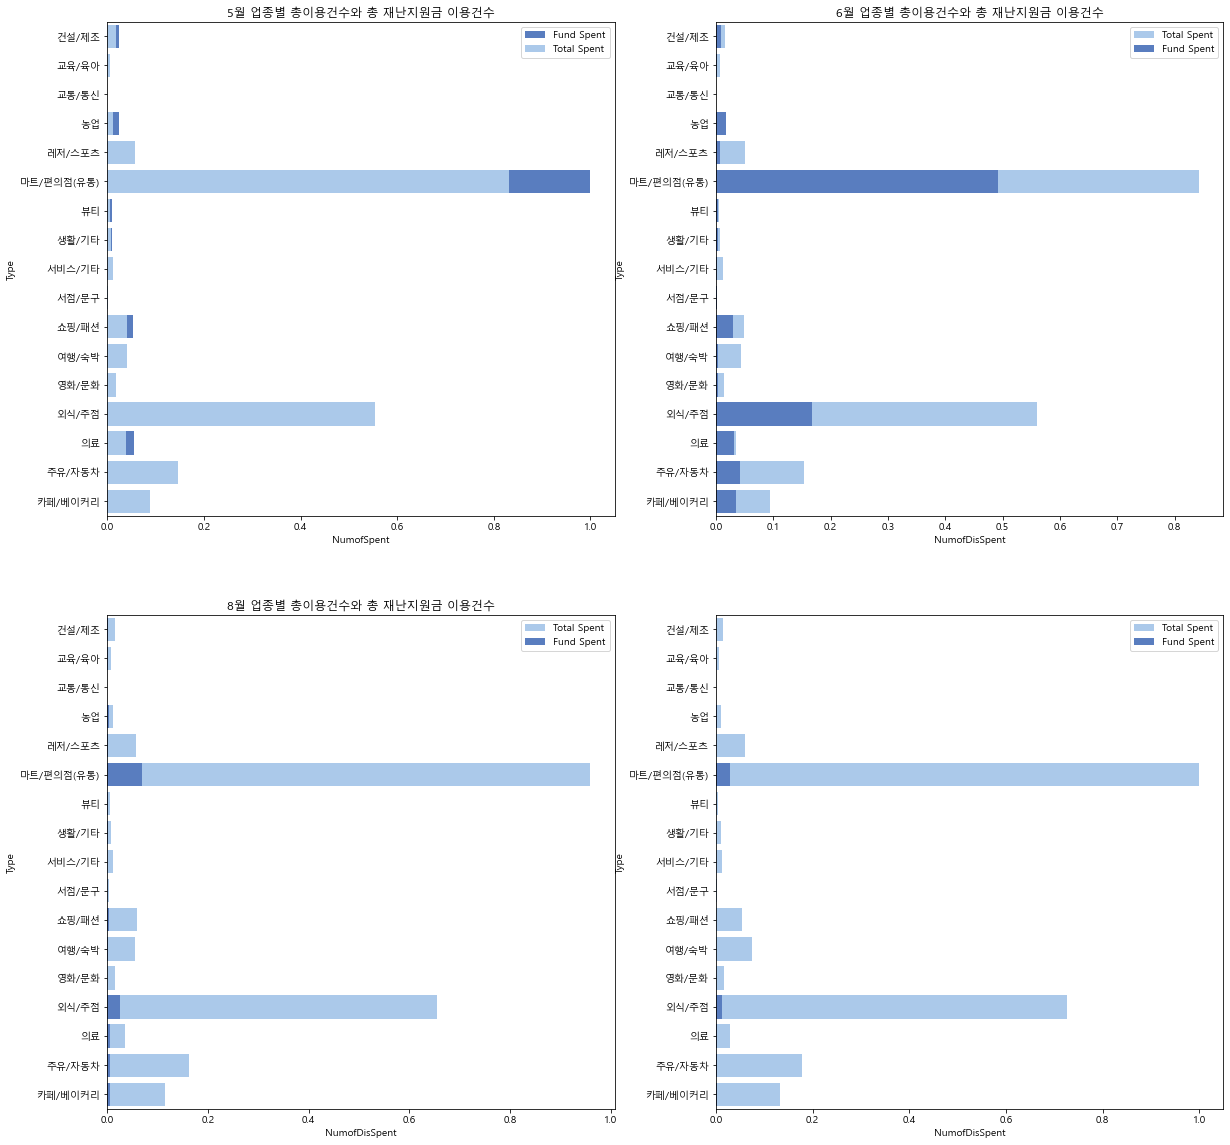

In [19]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(2, 2, 1)
ax1 = sns.set_color_codes('muted')
ax1 = sns.barplot(x='NumofDisSpent', y='Type', data=norm_ewol[norm_ewol['YM'] == 202005], label='Fund Spent', color='b')
ax1 = sns.set_color_codes('pastel')
ax1 = sns.barplot(x='NumofSpent', y='Type', data=norm_ewol[norm_ewol['YM'] == 202005], label='Total Spent', color='b')
ax1.legend(loc='best', frameon=True)
ax1.set_title('5월 업종별 총이용건수와 총 재난지원금 이용건수')

ax2 = fig.add_subplot(2, 2, 2)
ax2 = sns.set_color_codes('pastel')
ax2 = sns.barplot(x='NumofSpent', y='Type', data=norm_ewol[norm_ewol['YM'] == 202006], label='Total Spent', color='b')
ax2 = sns.set_color_codes('muted')
ax2 = sns.barplot(x='NumofDisSpent', y='Type', data=norm_ewol[norm_ewol['YM'] == 202006], label='Fund Spent', color='b')
ax2.legend(loc='best', frameon=True)
ax2.set_title('6월 업종별 총이용건수와 총 재난지원금 이용건수')

ax3 = fig.add_subplot(2, 2, 3)
ax3 = sns.set_color_codes('pastel')
ax3 = sns.barplot(x='NumofSpent', y='Type', data=norm_ewol[norm_ewol['YM'] == 202007], label='Total Spent', color='b')
ax3 = sns.set_color_codes('muted')
ax3 = sns.barplot(x='NumofDisSpent', y='Type', data=norm_ewol[norm_ewol['YM'] == 202007], label='Fund Spent', color='b')
ax3.legend(loc='best', frameon=True)
ax3.set_title('7월 업종별 총이용건수와 총 재난지원금 이용건수')

ax4 = fig.add_subplot(2, 2, 4)
ax4 = sns.set_color_codes('pastel')
ax4 = sns.barplot(x='NumofSpent', y='Type', data=norm_ewol[norm_ewol['YM'] == 202008], label='Total Spent', color='b')
ax4 = sns.set_color_codes('muted')
ax4 = sns.barplot(x='NumofDisSpent', y='Type', data=norm_ewol[norm_ewol['YM'] == 202008], label='Fund Spent', color='b')
ax4.legend(loc='best', frameon=True)
ax3.set_title('8월 업종별 총이용건수와 총 재난지원금 이용건수')
plt.show()

In [20]:
## norm 하지 않은 'NumofSpent', 'NumofDisSpent' barchart 따로 보기

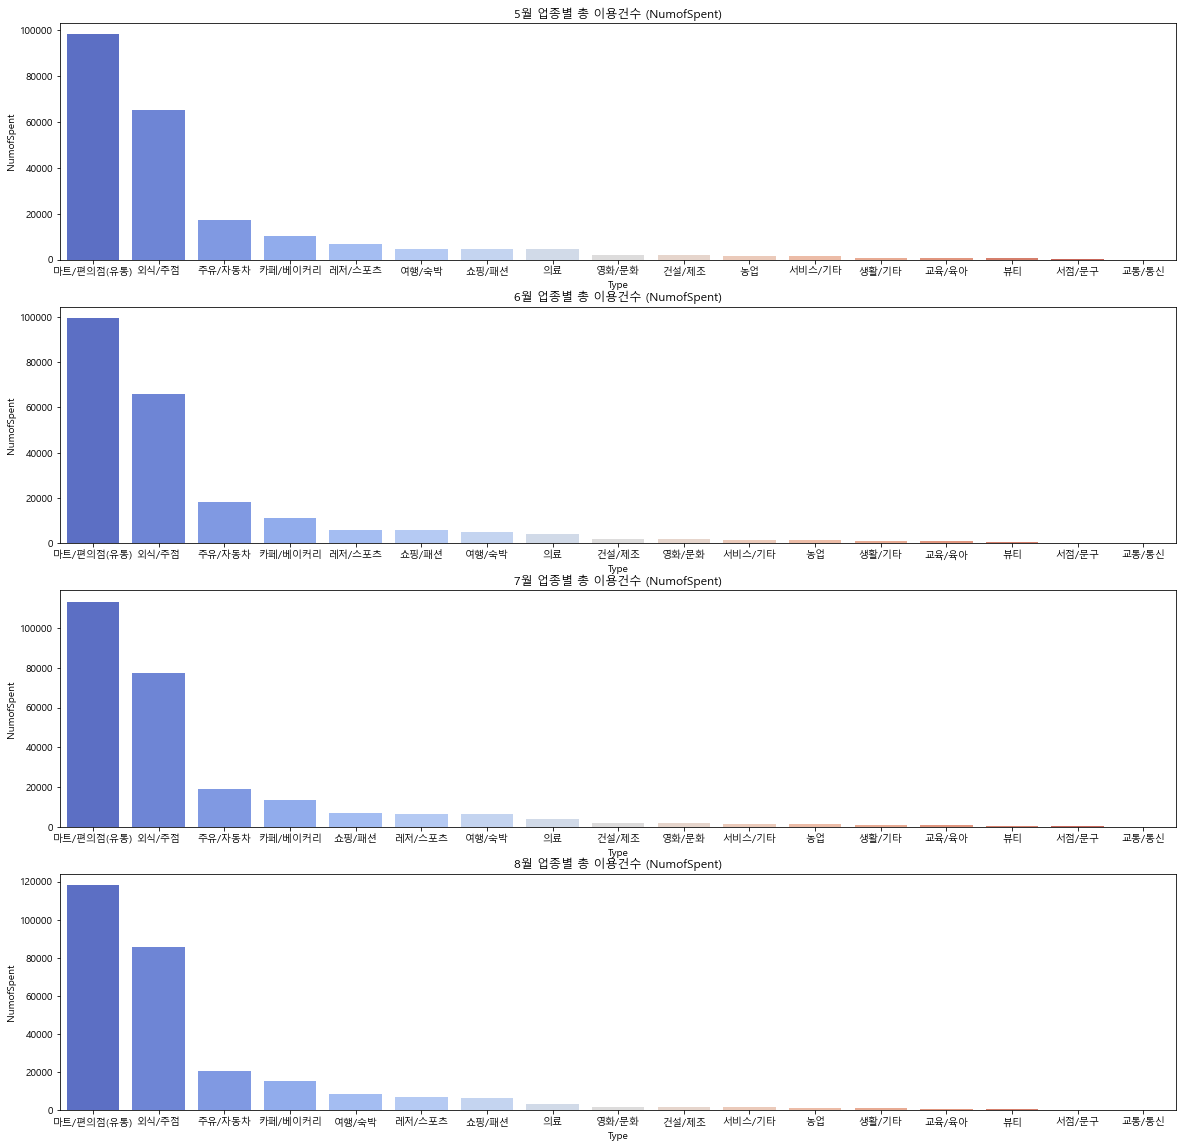

In [21]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(411)
ax1 = sns.barplot(x='Type', y='NumofSpent', data=tot_ewol[tot_ewol['YM'] == 202005].sort_values(by='NumofSpent', ascending=False), palette='coolwarm')
# ax1.set_xticks(fontsize=10, rotation=45)
ax1.set_title('5월 업종별 총 이용건수 (NumofSpent)')

ax2 = fig.add_subplot(412)
ax2 = sns.barplot(x='Type', y='NumofSpent', data=tot_ewol[tot_ewol['YM'] == 202006].sort_values(by='NumofSpent', ascending=False), palette='coolwarm')
# ax2.set_xticks(fontsize=10, rotation=45)
ax2.set_title('6월 업종별 총 이용건수 (NumofSpent)')

ax3 = fig.add_subplot(413)
ax3 = sns.barplot(x='Type', y='NumofSpent', data=tot_ewol[tot_ewol['YM'] == 202007].sort_values(by='NumofSpent', ascending=False), palette='coolwarm')
# ax3.set_xticks(fontsize=10, rotation=45)
ax3.set_title('7월 업종별 총 이용건수 (NumofSpent)')

ax4 = fig.add_subplot(414)
ax4 = sns.barplot(x='Type', y='NumofSpent', data=tot_ewol[tot_ewol['YM'] == 202008].sort_values(by='NumofSpent', ascending=False), palette='coolwarm')
# ax1.set_xticks(fontsize=10, rotation=45)
ax4.set_title('8월 업종별 총 이용건수 (NumofSpent)')
plt.show()

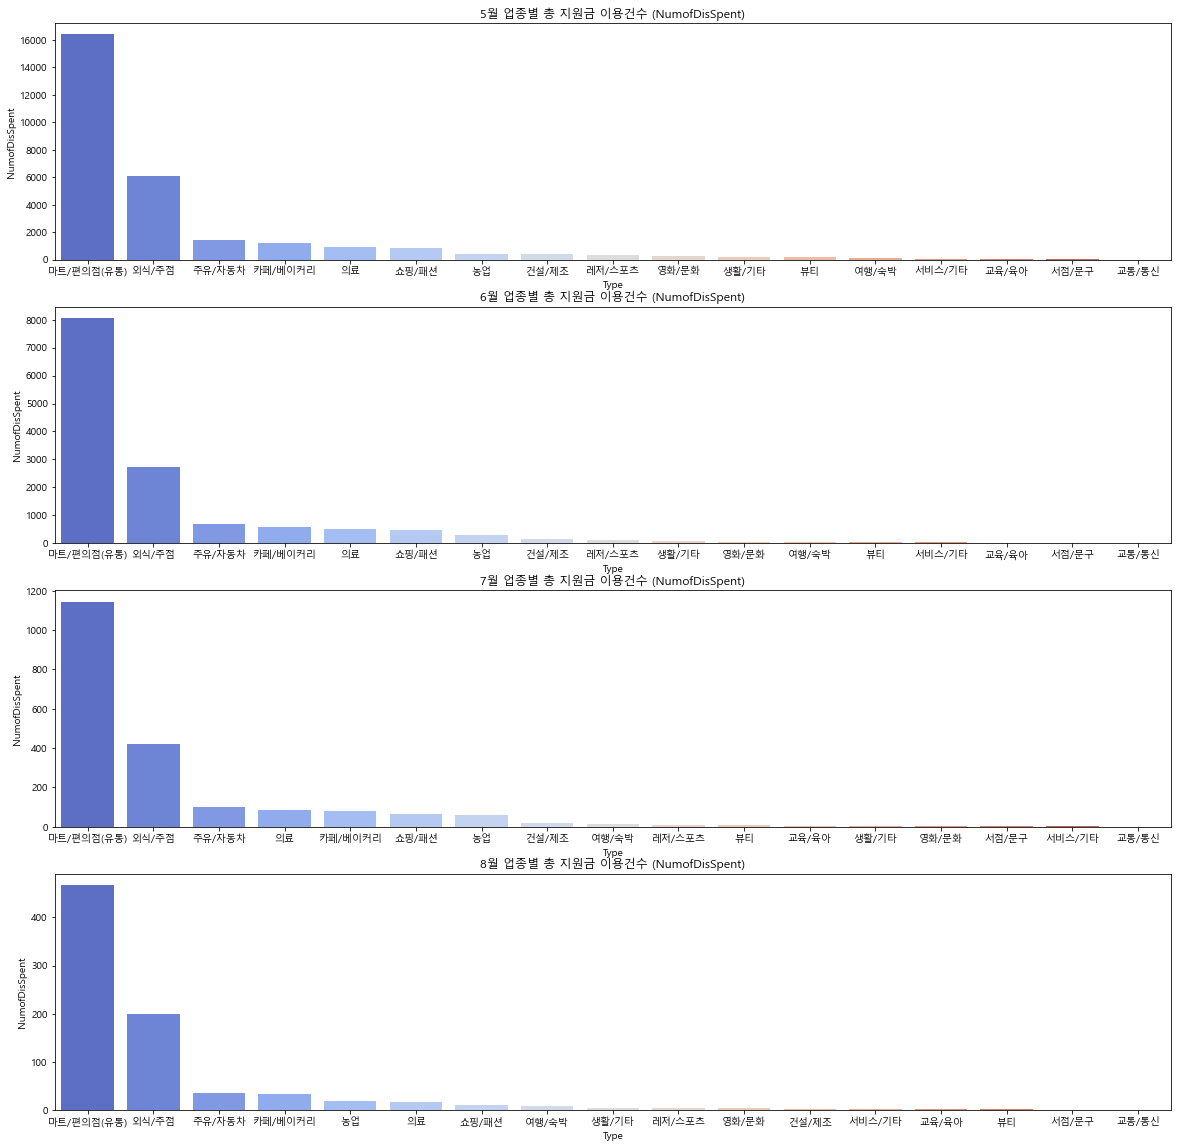

In [22]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(411)
ax1 = sns.barplot(x='Type', y='NumofDisSpent', data=tot_ewol[tot_ewol['YM'] == 202005].sort_values(by='NumofDisSpent', ascending=False), palette='coolwarm')
# ax1.set_xticks(fontsize=10, rotation=45)
ax1.set_title('5월 업종별 총 지원금 이용건수 (NumofDisSpent)')

ax2 = fig.add_subplot(412)
ax2 = sns.barplot(x='Type', y='NumofDisSpent', data=tot_ewol[tot_ewol['YM'] == 202006].sort_values(by='NumofDisSpent', ascending=False), palette='coolwarm')
# ax2.set_xticks(fontsize=10, rotation=45)
ax2.set_title('6월 업종별 총 지원금 이용건수 (NumofDisSpent)')

ax3 = fig.add_subplot(413)
ax3 = sns.barplot(x='Type', y='NumofDisSpent', data=tot_ewol[tot_ewol['YM'] == 202007].sort_values(by='NumofDisSpent', ascending=False), palette='coolwarm')
# ax3.set_xticks(fontsize=10, rotation=45)
ax3.set_title('7월 업종별 총 지원금 이용건수 (NumofDisSpent)')

ax4 = fig.add_subplot(414)
ax4 = sns.barplot(x='Type', y='NumofDisSpent', data=tot_ewol[tot_ewol['YM'] == 202008].sort_values(by='NumofDisSpent', ascending=False), palette='coolwarm')
# ax1.set_xticks(fontsize=10, rotation=45)
ax4.set_title('8월 업종별 총 지원금 이용건수 (NumofDisSpent)')
plt.show()

### 업종 시간대별 총 이용건수 추이

In [23]:
time_may_cat = ewol[ewol['YM'] == 202005].groupby(['Type', 'Time'], as_index=False).sum()
may_cat = ewol[ewol['YM'] == 202005].groupby(['Type'], as_index=False).sum()
may_cat = may_cat.sort_values(by='NumofSpent', ascending=False).head(10)
may_cat = [i for i in may_cat['Type']]
plot_may = time_may_cat[time_may_cat['Type'].isin((may_cat))]

time_jun_cat = ewol[ewol['YM'] == 202006].groupby(['Type', 'Time'], as_index=False).sum()
jun_cat = ewol[ewol['YM'] == 202006].groupby(['Type'], as_index=False).sum()
jun_cat = jun_cat.sort_values(by='NumofSpent', ascending=False).head(10)
jun_cat = [i for i in jun_cat['Type']]
plot_jun = time_jun_cat[time_jun_cat['Type'].isin((jun_cat))]

time_jul_cat = ewol[ewol['YM'] == 202007].groupby(['Type', 'Time'], as_index=False).sum()
jul_cat = ewol[ewol['YM'] == 202007].groupby(['Type'], as_index=False).sum()
jul_cat = jul_cat.sort_values(by='NumofSpent', ascending=False).head(10)
jul_cat = [i for i in jul_cat['Type']]
plot_jul = time_jul_cat[time_jul_cat['Type'].isin((jul_cat))]

time_aug_cat = ewol[ewol['YM'] == 202008].groupby(['Type', 'Time'], as_index=False).sum()
aug_cat = ewol[ewol['YM'] == 202008].groupby(['Type'], as_index=False).sum()
aug_cat = aug_cat.sort_values(by='NumofSpent', ascending=False).head(10)
aug_cat = [i for i in aug_cat['Type']]
plot_aug = time_aug_cat[time_aug_cat['Type'].isin((aug_cat))]

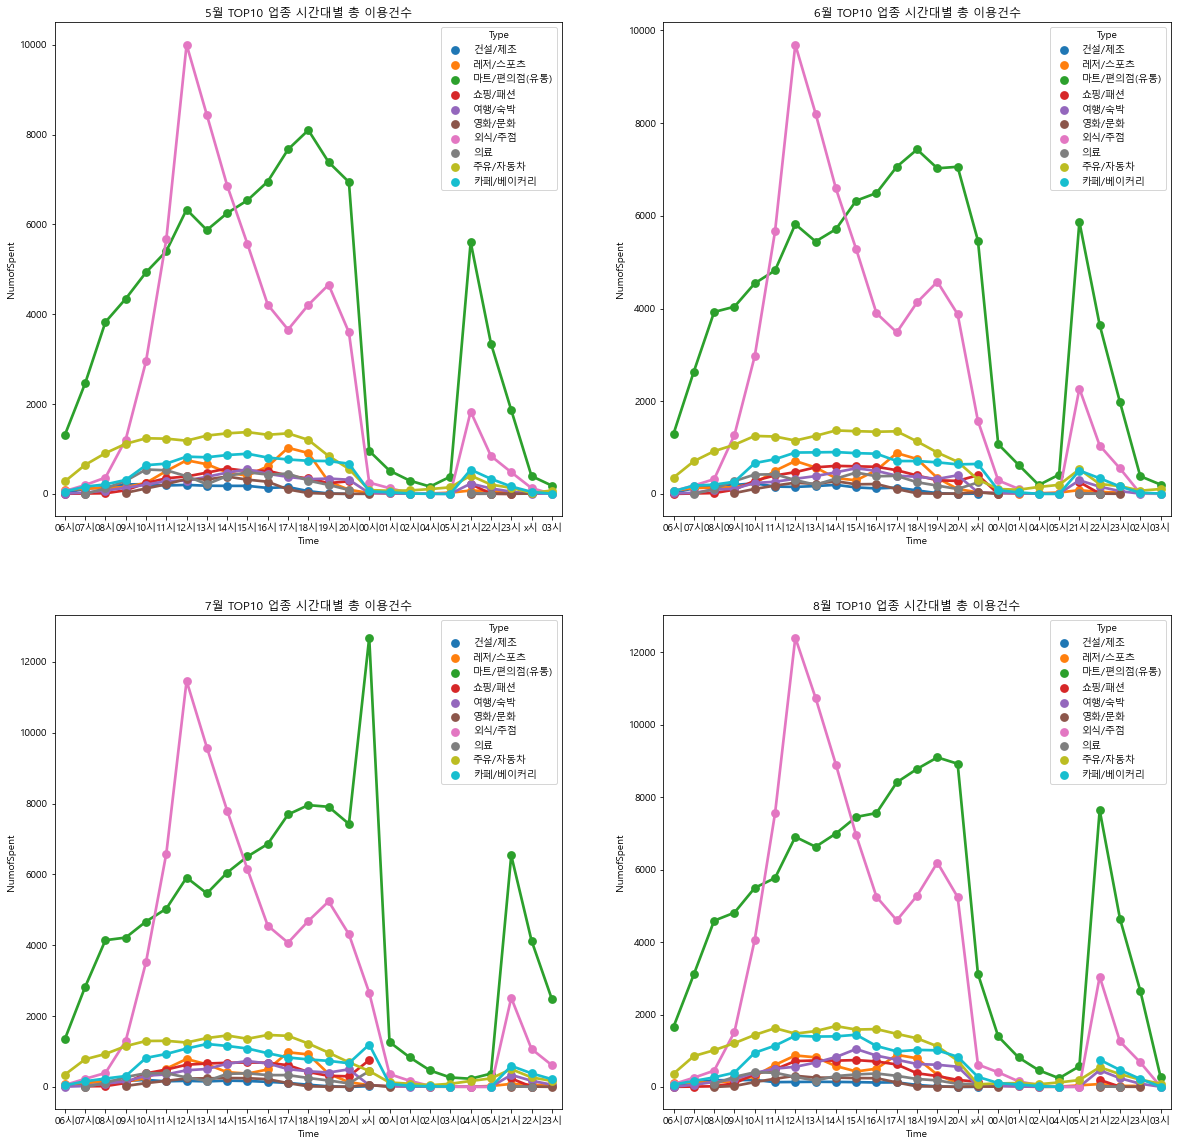

In [24]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax1 = sns.pointplot(x='Time', y='NumofSpent', hue='Type', data=plot_may)
ax1.set_title('5월 TOP10 업종 시간대별 총 이용건수')

ax2 = fig.add_subplot(222)
ax2 = sns.pointplot(x='Time', y='NumofSpent', hue='Type', data=plot_jun)
ax2.set_title('6월 TOP10 업종 시간대별 총 이용건수')

ax3 = fig.add_subplot(223)
ax3 = sns.pointplot(x='Time', y='NumofSpent', hue='Type', data=plot_jul)
ax3.set_title('7월 TOP10 업종 시간대별 총 이용건수')

ax4 = fig.add_subplot(224)
ax4 = sns.pointplot(x='Time', y='NumofSpent', hue='Type', data=plot_aug)
ax4.set_title('8월 TOP10 업종 시간대별 총 이용건수')
plt.show()

In [188]:
# col = ['NumofSpent', 'NumofDisSpent']
# num2_ewol = ewol[col] / ewol[col].max()

# norm2_ewol = ewol.copy()
# norm2_ewol[col] = num2_ewol[col]
# norm2_ewol.tail()

In [189]:
# time_may_cat = norm2_ewol[norm2_ewol['YM'] == 202005].groupby(['Type', 'Time'], as_index=False).sum()
# may_cat = norm2_ewol[norm2_ewol['YM'] == 202005].groupby(['Type'], as_index=False).sum()
# may_cat = may_cat.sort_values(by='NumofSpent', ascending=False).head(10)
# may_cat = [i for i in may_cat['Type']]
# plot_may = time_may_cat[time_may_cat['Type'].isin((may_cat))]

# time_jun_cat = norm2_ewol[norm2_ewol['YM'] == 202006].groupby(['Type', 'Time'], as_index=False).sum()
# jun_cat = norm2_ewol[norm2_ewol['YM'] == 202006].groupby(['Type'], as_index=False).sum()
# jun_cat = jun_cat.sort_values(by='NumofSpent', ascending=False).head(10)
# jun_cat = [i for i in jun_cat['Type']]
# plot_jun = time_jun_cat[time_jun_cat['Type'].isin((jun_cat))]

# time_jul_cat = norm2_ewol[norm2_ewol['YM'] == 202007].groupby(['Type', 'Time'], as_index=False).sum()
# jul_cat = norm2_ewol[norm2_ewol['YM'] == 202007].groupby(['Type'], as_index=False).sum()
# jul_cat = jul_cat.sort_values(by='NumofSpent', ascending=False).head(10)
# jul_cat = [i for i in jul_cat['Type']]
# plot_jul = time_jul_cat[time_jul_cat['Type'].isin((jul_cat))]

# time_aug_cat = norm2_ewol[norm2_ewol['YM'] == 202008].groupby(['Type', 'Time'], as_index=False).sum()
# aug_cat = norm2_ewol[norm2_ewol['YM'] == 202008].groupby(['Type'], as_index=False).sum()
# aug_cat = aug_cat.sort_values(by='NumofSpent', ascending=False).head(10)
# aug_cat = [i for i in aug_cat['Type']]
# plot_aug = time_aug_cat[time_aug_cat['Type'].isin((aug_cat))]

In [190]:
# fig = plt.figure(figsize=(20,20))
# ax1 = fig.add_subplot(221)
# ax1 = sns.pointplot(x='Time', y='NumofSpent', hue='Type', data=plot_may)
# ax1.set_title('5월 TOP10 업종 시간대별 총 이용건수')

# ax2 = fig.add_subplot(222)
# ax2 = sns.pointplot(x='Time', y='NumofSpent', hue='Type', data=plot_jun)
# ax2.set_title('6월 TOP10 업종 시간대별 총 이용건수')

# ax3 = fig.add_subplot(223)
# ax3 = sns.pointplot(x='Time', y='NumofSpent', hue='Type', data=plot_jul)
# ax3.set_title('7월 TOP10 업종 시간대별 총 이용건수')

# ax4 = fig.add_subplot(224)
# ax4 = sns.pointplot(x='Time', y='NumofSpent', hue='Type', data=plot_aug)
# ax4.set_title('8월 TOP10 업종 시간대별 총 이용건수')
# plt.show()

In [25]:
tim_ewol = ewol.groupby(['YM', 'Type', 'Time'], as_index=False).sum()
tim_ewol['Type'].unique()

array(['건설/제조', '교육/육아', '교통/통신', '농업', '레저/스포츠', '마트/편의점(유통)', '뷰티',
       '생활/기타', '서비스/기타', '서점/문구', '쇼핑/패션', '여행/숙박', '영화/문화', '외식/주점',
       '의료', '주유/자동차', '카페/베이커리'], dtype=object)

In [26]:
## '먹거리'라고 생각되는 Type 따로 불러와서 시간대별 추이 보기

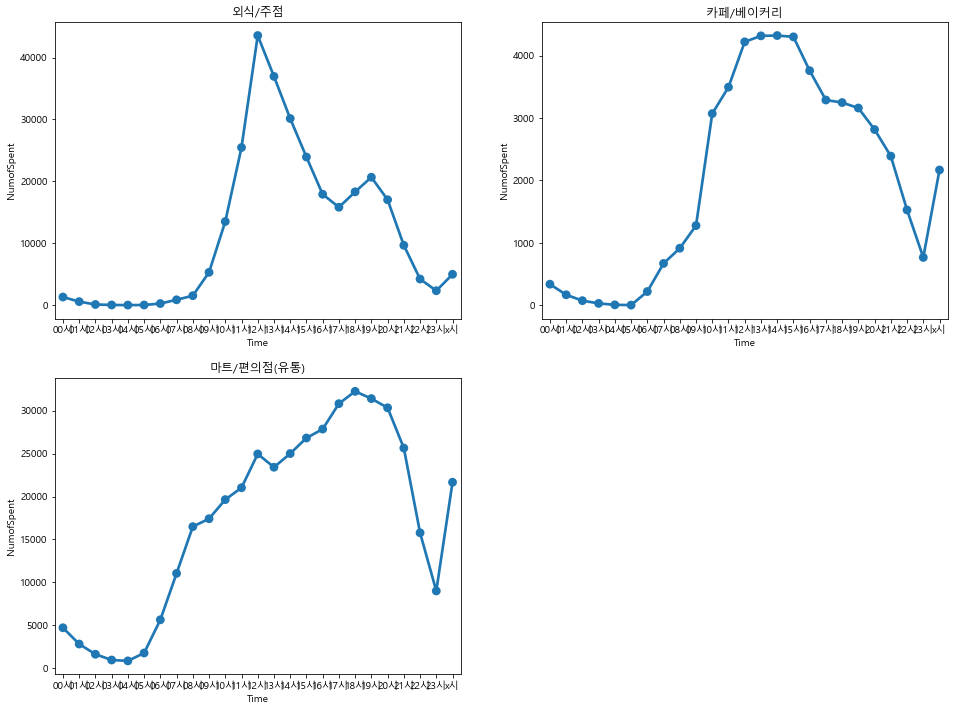

In [27]:
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(2, 2, 1)
ax1 = sns.pointplot(x='Time', y='NumofSpent', data=tim_ewol[(tim_ewol['Type'] == '외식/주점')].groupby(['Type', 'Time'], as_index=False)['NumofSpent'].sum())
ax1.set_title('외식/주점')
ax2 = fig.add_subplot(2, 2, 2)
ax2 = sns.pointplot(x='Time', y='NumofSpent', data=tim_ewol[(tim_ewol['Type'] == '카페/베이커리')].groupby(['Type', 'Time'], as_index=False)['NumofSpent'].sum())
ax2.set_title('카페/베이커리')
ax3 = fig.add_subplot(2, 2, 3)
ax3 = sns.pointplot(x='Time', y='NumofSpent', data=tim_ewol[(tim_ewol['Type'] == '마트/편의점(유통)')].groupby(['Type', 'Time'], as_index=False)['NumofSpent'].sum())
ax3.set_title('마트/편의점(유통)')
plt.show()

### folium

In [39]:
ewol.tail()

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lon,lat,lon_lat,dong,Category
279989,242126,242126,202008,제주특별자치도,제주시,일반,일반한식,21시,12000,0,1,0,886282.6314,1.494204e+06,126.27669458207966,33.43353201264066,126.27669458207966_33.43353201264066,한림읍,카페/베이커리
279990,253957,253957,202008,제주특별자치도,제주시,일반,일반한식,22시,40000,0,3,0,886282.6314,1.494204e+06,126.27669458207966,33.43353201264066,126.27669458207966_33.43353201264066,한림읍,외식/주점
279991,262896,262896,202008,제주특별자치도,제주시,일반,일반한식,23시,20000,0,1,0,886282.6314,1.494204e+06,126.27669458207966,33.43353201264066,126.27669458207966_33.43353201264066,한림읍,마트/편의점(유통)
280067,269676,269676,202008,제주특별자치도,제주시,영세,예체능학원,x시,44000,0,1,0,884694.4071,1.491897e+06,126.25990864697245,33.41256244335509,126.25990864697245_33.41256244335509,한림읍,외식/주점
280068,270027,270027,202008,제주특별자치도,제주시,영세,기타교육,x시,240000,0,1,0,887877.0846,1.495211e+06,126.29371775568167,33.44278262819118,126.29371775568167_33.44278262819118,한림읍,외식/주점


In [28]:
# 외식/주점
wesik = ewol[ewol['Type'] == '외식/주점']
wesik = wesik[['SIGUNGU','FranClass','Type','lon','lat','lon_lat']]
wesik.drop_duplicates(inplace=True)

# 마트/편의점(유통)
mart = ewol[ewol['Type'] == '마트/편의점(유통)']
mart = mart[['SIGUNGU','FranClass','Type','lon','lat','lon_lat']]
mart.drop_duplicates(inplace=True)

# 카페/베이커리
cafe = ewol[ewol['Type'] == '카페/베이커리']
cafe = cafe[['SIGUNGU','FranClass','Type','lon','lat','lon_lat']]
cafe.drop_duplicates(inplace=True)

# 주유/자동차
car = ewol[ewol['Type'] == '주유/자동차']
car = car[['SIGUNGU','FranClass','Type','lon','lat','lon_lat']]
car.drop_duplicates(inplace=True)

In [29]:
import folium
from folium.plugins import MarkerCluster, MiniMap

In [30]:
map = folium.Map((33.447843033444606, 126.30114679770172), zoom_start=13)
mc = MarkerCluster()

mc.add_child(folium.Marker(location=[33.447843033444606, 126.30114679770172], icon=folium.Icon(color='red')))
minimap = MiniMap()
map.add_child(minimap)

In [31]:
map = folium.Map((33.447843033444606, 126.30114679770172), zoom_start= 13)

# 외식/주점 
for i in range(len(wesik['Type'])):
    folium.Circle(list(wesik.iloc[i][['lat','lon']]), radius=5, color='crimson', fill_color='crimson').add_to(map)
    
# 마트/편의점(유통) 
for i in range(len(mart['Type'])):
    folium.Circle(list(mart.iloc[i][['lat','lon']]), radius=5, color='orange', fill_color='orange').add_to(map)
    
# 카페/베이커리 
for i in range(len(cafe['Type'])):
    folium.Circle(list(cafe.iloc[i][['lat','lon']]), radius=5, color='green', fill_color='green').add_to(map)

# 주유/자동차
for i in range(len(car['Type'])):
    folium.Circle(list(car.iloc[i][['lat','lon']]), radius=5, color='gray', fill_color='gray').add_to(map)
    
map